# Classification using TidyModels

In this lab we would be going through:
- Logistic Regression
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis

using TidyModels. 

For this lab, we would examining the `OJ` data set that contains a number of numeric variables plus a variable called `Purchase` which has the two labels `CH` and `MM` (which is Citrus Hill or Minute Maid Orange Juice)

In [1]:
suppressPackageStartupMessages(library(tidymodels))
suppressPackageStartupMessages(library(ISLR))
suppressPackageStartupMessages(library(discrim))
suppressPackageStartupMessages(library(corrr))


In [2]:
head(OJ)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [3]:
attach(OJ)

The `correlate()` function (from `corrr` package) will calculate the correlation matrix between all the variables that it is being fed.

In [4]:
cor_oj <- OJ %>%
  select(-Purchase, -Store7) %>% #Remove Purchase & Store as it not numeric
  correlate()


Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'




Lets pass this correlation to `rplot()` to visualize the correlation matrix

Don't know how to automatically pick scale for object of type noquote. Defaulting to continuous.



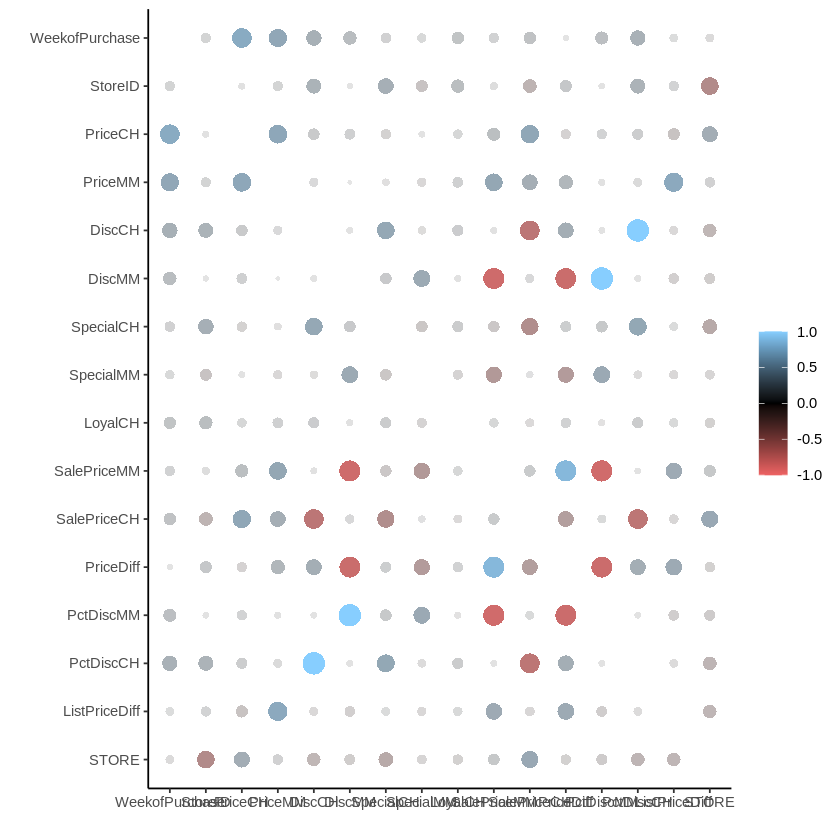

In [5]:
rplot(cor_oj, colours = c("indianred2", "black", "skyblue1"))

## Logistic Regression

Now we will fit a logistic regression model. We will again use the `parsnip` package, and we will use `logistic_reg()` to create a logistic regression model specification.

In [6]:
lr_spec <- logistic_reg() %>%
  set_engine("glm") %>% #default engine
  set_mode("classification") #default mode

We want to model the `Direction` of the stock market based on the percentage return from the 5 previous days plus the volume of shares traded. 

In [7]:
lr_fit <- lr_spec %>%
  fit(
    Purchase ~ PriceCH + PriceMM + SalePriceMM + SalePriceCH + WeekofPurchase,
    data = OJ
    )

lr_fit

parsnip model object

Fit time:  10ms 

Call:  stats::glm(formula = Purchase ~ PriceCH + PriceMM + SalePriceMM + 
    SalePriceCH + WeekofPurchase, family = stats::binomial, data = data)

Coefficients:
   (Intercept)         PriceCH         PriceMM     SalePriceMM     SalePriceCH  
       2.78191         0.69780        -0.84973        -1.84587         3.49967  
WeekofPurchase  
      -0.02184  

Degrees of Freedom: 1069 Total (i.e. Null);  1064 Residual
Null Deviance:	    1431 
Residual Deviance: 1320 	AIC: 1332

In [8]:
lr_fit %>%
  pluck("fit") %>%
  summary()


Call:
stats::glm(formula = Purchase ~ PriceCH + PriceMM + SalePriceMM + 
    SalePriceCH + WeekofPurchase, family = stats::binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7977  -0.9765  -0.7307   1.1663   2.2329  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     2.78191    1.27287   2.186  0.02885 *  
PriceCH         0.69780    1.27510   0.547  0.58420    
PriceMM        -0.84973    0.77077  -1.102  0.27027    
SalePriceMM    -1.84587    0.32814  -5.625 1.85e-08 ***
SalePriceCH     3.49967    0.79278   4.414 1.01e-05 ***
WeekofPurchase -0.02184    0.00697  -3.134  0.00173 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1430.9  on 1069  degrees of freedom
Residual deviance: 1320.0  on 1064  degrees of freedom
AIC: 1332

Number of Fisher Scoring iterations: 4


The `summary()` lets us see a couple of different things such as; parameter estimates, standard errors, p-values, and model fit statistics. 

we can use the `tidy()` function to extract some of these model attributes for further analysis or presentation.

In [9]:
tidy(lr_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.78190730,1.27286701,2.185544,2.884896e-02
PriceCH,0.69780075,1.27509476,0.547254,5.842042e-01
PriceMM,-0.84973062,0.77076842,-1.102446,2.702678e-01
SalePriceMM,-1.84586939,0.32814297,-5.625199,1.852947e-08
SalePriceCH,3.49966954,0.79278219,4.414415,1.012835e-05
WeekofPurchase,-0.02184087,0.00696997,-3.133568,1.726951e-03


In [10]:
predict(lr_fit, new_data = OJ)

.pred_class
<fct>
CH
MM
CH
MM
MM
CH
MM
MM
MM


The result is a tibble with a single column `.pred_class` which will be a factor variable of the same labels as the original training data set.

We can also get back probability predictions, by specifying `type = "prob"`

In [11]:
predict(lr_fit, new_data = OJ, type = "prob")

.pred_CH,.pred_MM
<dbl>,<dbl>
0.6018192,0.39818080
0.4757620,0.52423803
0.7291985,0.27080149
0.4104296,0.58957038
0.4157248,0.58427524
0.6252782,0.37472175
0.4544633,0.54553672
0.4035200,0.59647996
0.4087878,0.59121215


We can describe a `confusion matrix` that would help us understand how well the predictive model is preforming by given a table of predicted values against the true value

`augment()` function helps add the predictions to the `data.frame` and then use that to look at model performance metrics.

In [12]:
augment(lr_fit, new_data = OJ) %>%
  conf_mat(truth = Purchase, estimate = .pred_class)

          Truth
Prediction  CH  MM
        CH 542 266
        MM 111 151

 We can represent this as a `heatmap`

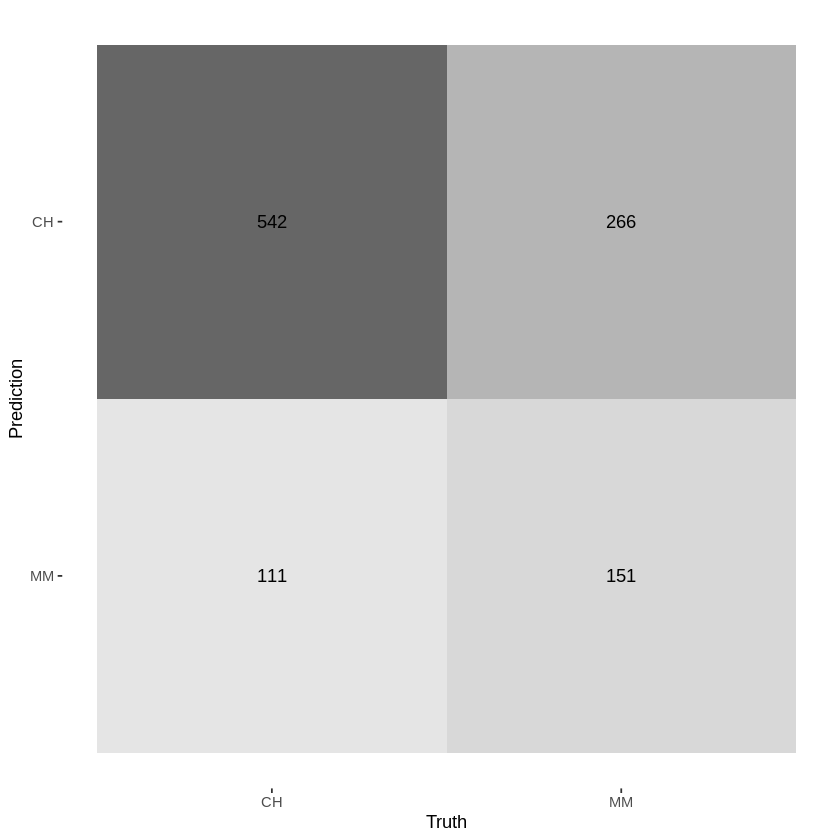

In [13]:
augment(lr_fit, new_data = OJ) %>%
  conf_mat(truth = Purchase, estimate = .pred_class) %>%
  autoplot(type = "heatmap")

A good performing model would ideally have high numbers along the diagonal (up-left to down-right) with small numbers on the off-diagonal. We see here that the model isn’t great, as it tends to predict `"CH"` as `"MM"` more often than it should.

We can also calculate various performance metrics. One of the most common metrics is accuracy, which is how often the model predicted correctly as a percentage.

In [14]:
augment(lr_fit, new_data = OJ) %>%
  accuracy(truth = Purchase, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6476636


Fitting a model and evaluating the model on the same data would give much information abou the model's performance.

Let us instead split up the data, train it on some of it and then evaluate it on the other part of the data. Since we are working with some data that has a time component,lets train the data over a before a specific week and test it over the set of other weeks.

This would more closely match how such a model would be used in real life.

In [15]:
mean(WeekofPurchase)

[1] 254.3813

In [16]:
oj_train <- OJ %>%
  filter(WeekofPurchase < 260)
dim(oj_train)

oj_test <- OJ %>%
  filter(WeekofPurchase >= 260)
dim(oj_test)

dim(OJ)

[1] 600  18

[1] 470  18

[1] 1070   18

In [28]:
# Build an lr model that fits Purchase as response with other numeric variables
# Predictors: PriceCH, PriceMM, DiscCH, DiscMM, PctDiscMM, PctDiscCH
# Modeled over the training data set created above
lr.fit = function(){
    # your code here
    # Create a linear regression model
    lr_model <- lm(Purchase ~ PriceCH + PriceMM + DiscCH + DiscMM + PctDiscMM + PctDiscCH, data = oj_train)

    # Fit the model
    lr_fit <- lr_model

    # Print the summary of the model
    summary(lr_fit)
}


In [29]:
summary = lr.fit() %>% pluck('fit') %>% summary()
coeff = coef(summary)

stopifnot(round(coeff[1],2) == 1.47) #Intercept test case
stopifnot(round(coeff[2],2) == 2.99) #PriceCH test case

Warning message in model.response(mf, "numeric"):
“using type = "numeric" with a factor response will be ignored”
Warning message in Ops.factor(y, z$residuals):
“‘-’ not meaningful for factors”
Warning message in Ops.factor(r, 2):
“‘^’ not meaningful for factors”


ERROR: Error: $ operator is invalid for atomic vectors


In [30]:
# hidden test cases

In [34]:
# Return a confusion matrix and accuracy of the model lr.fit 
# the matrix has to be defined over the test data set 
confusion_matrix = function(){
    # your code here
  # Make predictions on the test dataset
    predictions <- predict(lr_fit, newdata = oj_test, type = "response")

  # Convert predictions to binary values (0 or 1) based on a threshold of 0.5
    binary_predictions <- ifelse(predictions >= 0.5, 1, 0)

  # Create the confusion matrix
    cm <- table(oj_test$Purchase, binary_predictions)

  # Return the confusion matrix
    return(cm)
    
}

accuracy.fit = function(){
    # your code here
    # Make predictions on the test dataset
    predictions <- predict(lr_fit, newdata = oj_test, type = "response")

  # Convert predictions to binary values (0 or 1) based on a threshold of 0.5
    binary_predictions <- ifelse(predictions >= 0.5, 1, 0)

  # Calculate the accuracy
    accuracy <- sum(binary_predictions == oj_test$Purchase) / nrow(oj_test)

  # Return the accuracy
    return(accuracy)
    
}

In [35]:
confusion_matrix()


accuracy = accuracy.fit()
stopifnot(round(accuracy[3],2) == 0.70) #Accuracy test case

ERROR: [1m[33mError[39m in [1m[1m`check_pred_type()`:[22m
[33m![39m `type` should be one of: raw, numeric, class, prob, conf_int, pred_int, quantile, time, survival, linear_pred and hazard


In [33]:
# hidden test cases

## Linear Discriminant Analysis

We will use the `discrim_linear()` function to create a LDA specification. We are gonna use two predictors (`PriceCH` & `PriceMM`) for easy comparision

In [ ]:
lda_spec <- discrim_linear() %>%
  set_mode("classification") %>%
  set_engine("MASS")

In [ ]:
lda_fit = lda_spec %>%
  fit(Purchase ~ PriceCH + PriceMM, data = oj_train)

lda_fit

In [ ]:
predict(lda_fit, new_data = oj_test)

In [ ]:
#confusion matrix
augment(lda_fit, new_data = oj_test) %>%
  conf_mat(truth = Purchase, estimate = .pred_class)

#accuracy 
augment(lda_fit, new_data = oj_test) %>%
      accuracy(truth = Purchase, estimate = .pred_class)

Lets compare this to `lr()` fit

In [ ]:
lda_fit_2 = lda_spec %>%
  fit(Purchase ~ PriceCH + PriceMM + DiscCH + DiscMM + PctDiscMM + PctDiscCH,
      data = oj_train)

#accuracy
augment(lda_fit_2, new_data = oj_test) %>%
      accuracy(truth = Purchase, estimate = .pred_class)

## Quadratic Discriminant Analysis

We can fit a `QDA` model by using the `discrim_quad()` function. 

In [ ]:
qda_spec = discrim_quad() %>%
  set_mode("classification") %>%
  set_engine("MASS")

`qda_spec` has a similar usage as `lda_spec`. so, 

In [ ]:
qda_fit = qda_spec %>% fit(Purchase ~ PriceCH + PriceMM, 
                           data = oj_train)
qda_fit

In [ ]:
#confusion matrix
augment(qda_fit, new_data = oj_test) %>%
  conf_mat(truth = Purchase, estimate = .pred_class) 

#accuracy
augment(qda_fit, new_data = oj_test) %>%
  accuracy(truth = Purchase, estimate = .pred_class) 

We can see that, `QDA` performs better compared to `LDA` using two predictors

Now lets compare all the three fits with 6 predictors

In [ ]:
qda_fit_2 = qda_spec %>%
  fit(Purchase ~ PriceCH + PriceMM + DiscCH + DiscMM + PctDiscMM + PctDiscCH,
      data = oj_train)

#accuracy
augment(qda_fit_2, new_data = oj_test) %>%
      accuracy(truth = Purchase, estimate = .pred_class)

In [ ]:
get_accuracy = function(fit){
    accuracy = augment(fit, new_data = oj_test) %>% 
      accuracy(truth = Purchase, estimate = .pred_class)
    accuracy[3]
}
accuracy_matrix = matrix(c( get_accuracy(lr.fit())
                           , get_accuracy(lda_fit_2)
                           , get_accuracy(qda_fit_2))
                           , nrow = 1, ncol = 3, byrow=FALSE)
colnames(accuracy_matrix) = c("LR", "LDA", "QDA")
accuracy_matrix

we can see that the `QDA` works better for this data where as `LDA` and `LR` work similary for this data set